# Prediction using Unsupervised ML (Level - Beginner)


### Promblem statement:
From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

## Credits:Saya Vamshi Krishna

## Step1 :-- Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

import warnings
warnings.filterwarnings("ignore")

##  Step2:-- Load the Data-Set
#### (From local host)

In [2]:
iris_df = pd.read_csv('Iris.csv')

In [3]:
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#Dropping the id column
iris_df.drop('Id', axis = 1, inplace = True)

## Step 3  :-- Data Information & Description:

In [5]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Step 4:--Data Visualization 

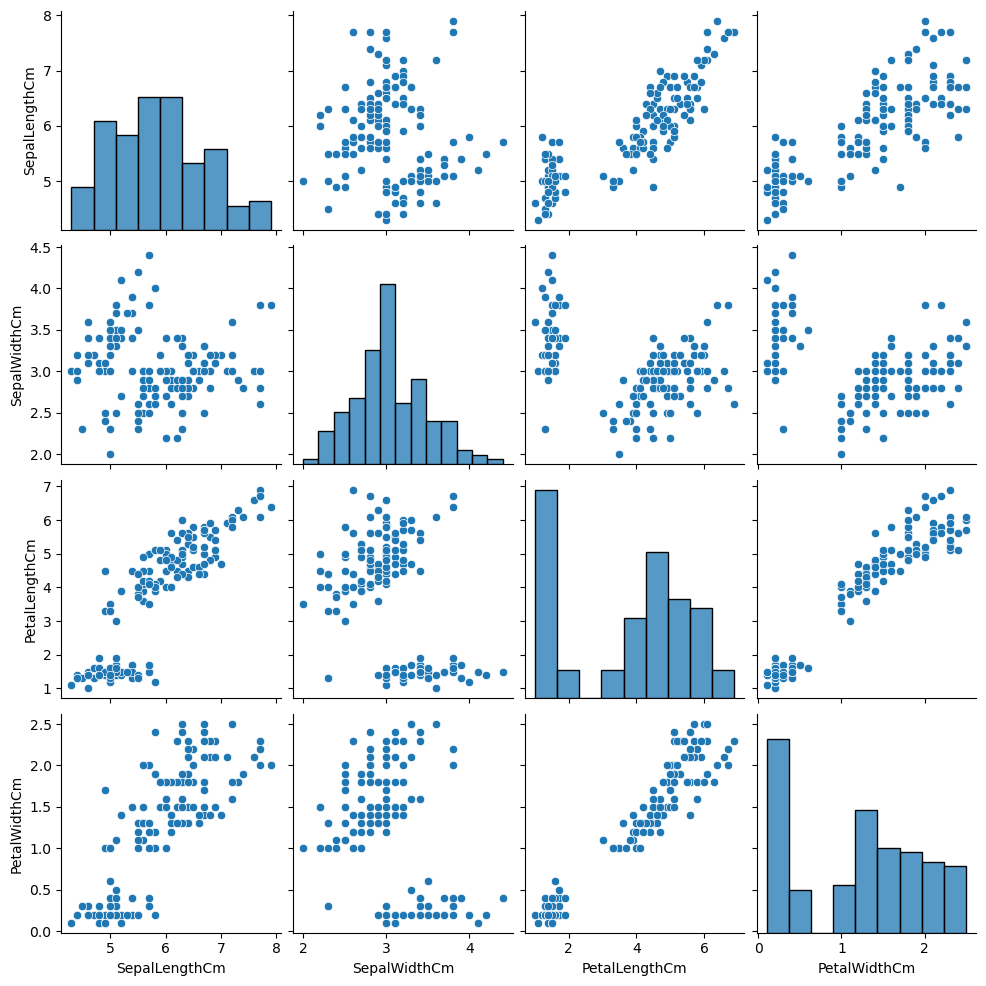

In [6]:
sns.pairplot(iris_df)

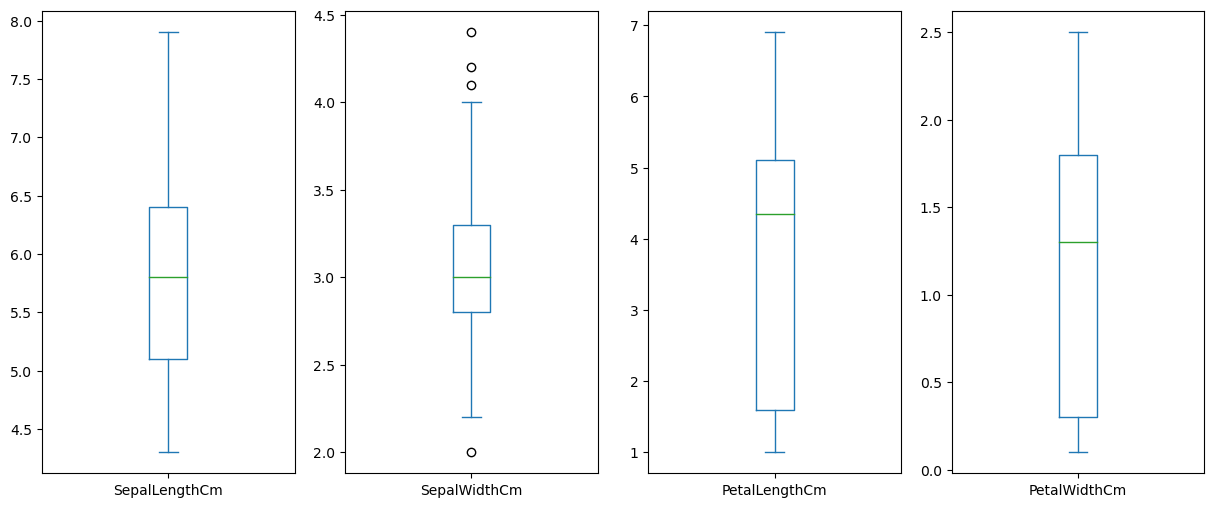

In [7]:
iris_df.plot.box(subplots = True, sharex = False, sharey = False, figsize = (15, 6))
plt.show()

In [8]:
# Assuming 'Species' is the non-numeric column
numeric_columns = iris_df.select_dtypes(include=[np.number]).columns.tolist()
numeric_df = iris_df[numeric_columns]
num_val = numeric_df.corr()


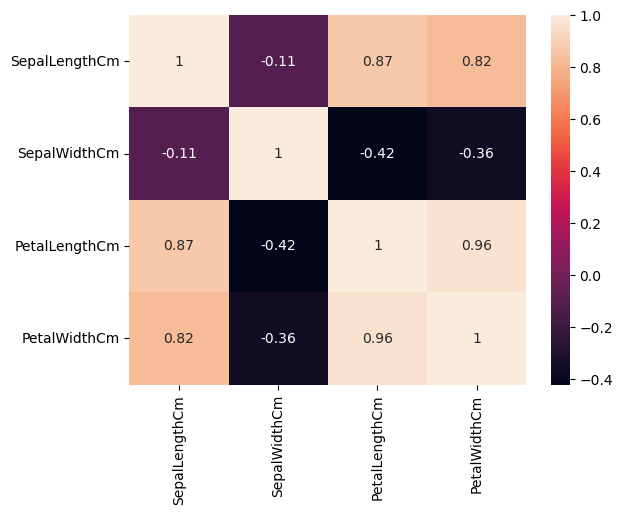

In [9]:
sns.heatmap(num_val, annot = True)
plt.show()

In [10]:
iris_df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values

### Step 5:-- K- Mean Model Development & Evaluation 

In [12]:
iris_df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [13]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values

In [14]:
from sklearn.cluster import KMeans


In [15]:
inertia_values = []
k_range = range(1, 15)

for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    inertia_values.append(kmeans.inertia_)

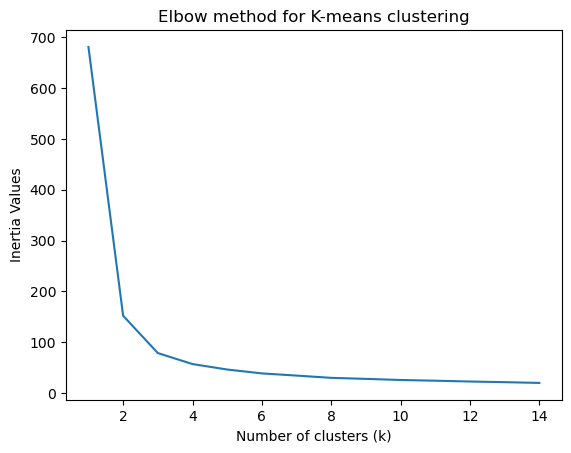

In [16]:
plt.plot(k_range, inertia_values)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia Values')
plt.title('Elbow method for K-means clustering')
plt.show()

### Final Model

In [17]:
k_means = KMeans(n_clusters = 3, max_iter = 300, random_state = 0, init = 'k-means++')
k_means.fit(x)
pred_y = k_means.predict(x)

In [18]:
print(pred_y)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [19]:
print(k_means.cluster_centers_)


[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


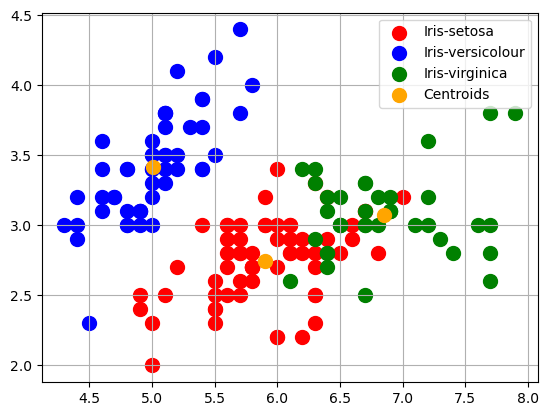

In [20]:
# Visualising the clusters - On the first two columns
plt.scatter(x[pred_y == 0, 0], x[pred_y == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[pred_y == 1, 0], x[pred_y == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[pred_y == 2, 0], x[pred_y == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:,1], 
            s = 100, c = 'orange', label = 'Centroids')

plt.legend()
plt.grid(True)
plt.show()